# Dataset
**https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:

col = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
url = 'https://raw.githubusercontent.com/jarif87/DataSets/main/magic04.csv'
df=pd.read_csv(url,names=col)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g



## g==0
## h==1



In [3]:
df["class"]=(df["class"]=="h").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


In [4]:
df.shape

(19020, 11)

In [5]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [6]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,0.351630
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,0.477492
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,0.000000
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,0.000000
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


In [7]:
df["class"].value_counts()

0    12332
1     6688
Name: class, dtype: int64

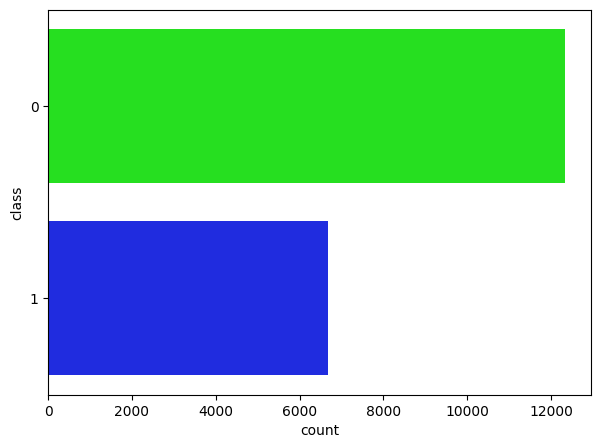

In [8]:
plt.figure(figsize=(7,5))
sns.countplot(y="class",data=df,palette="hsv")
plt.show()

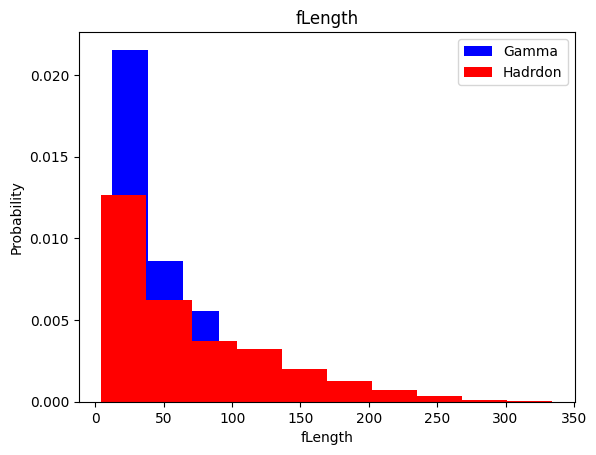

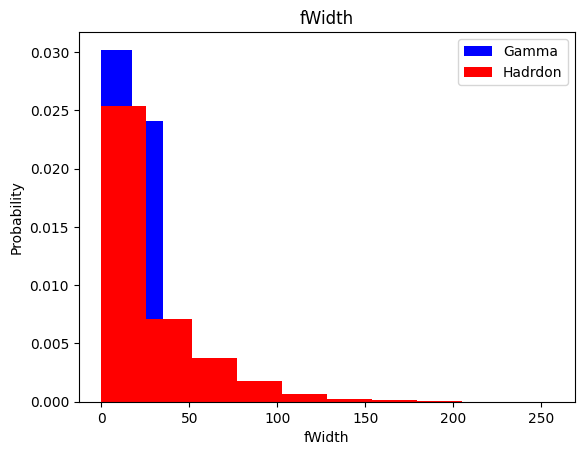

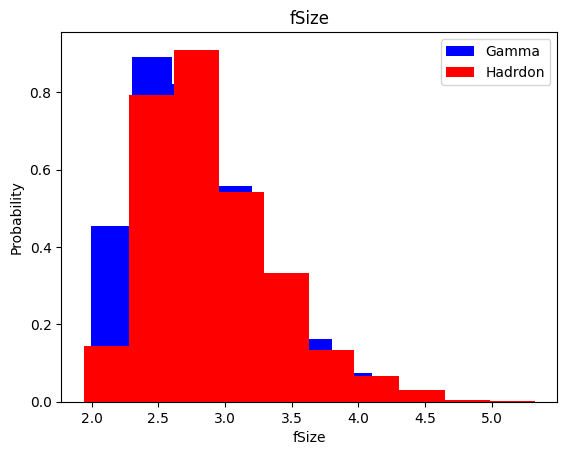

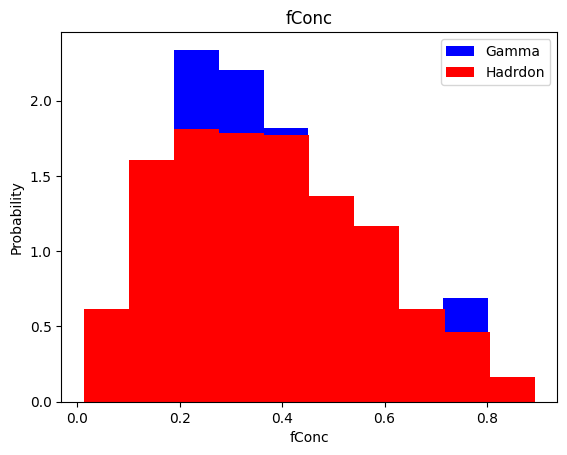

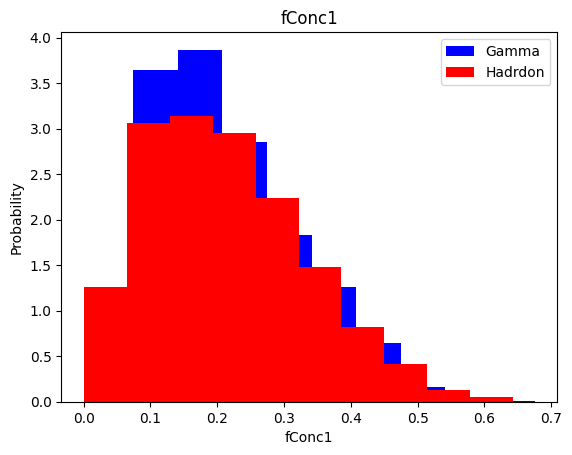

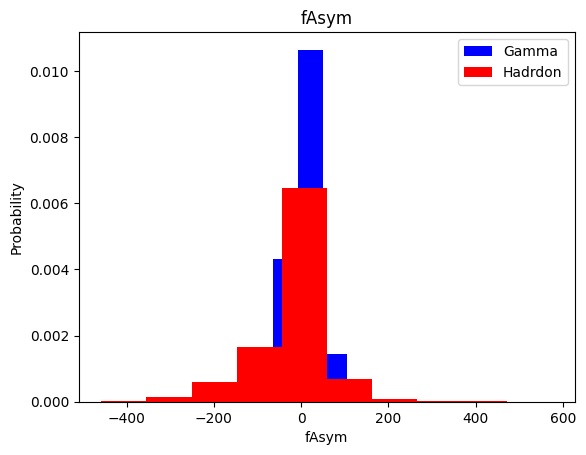

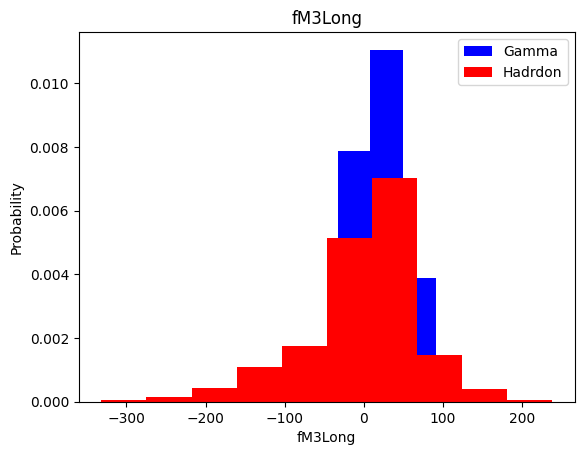

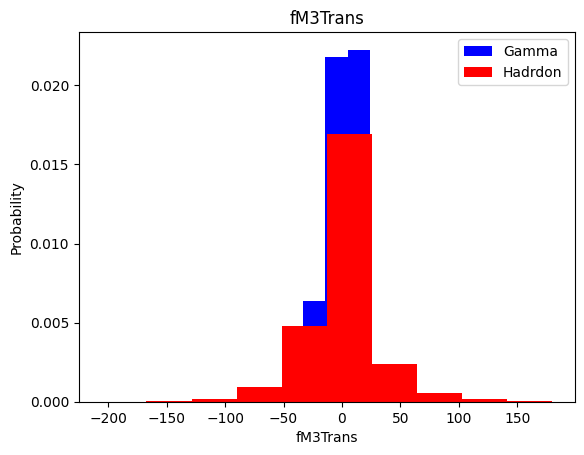

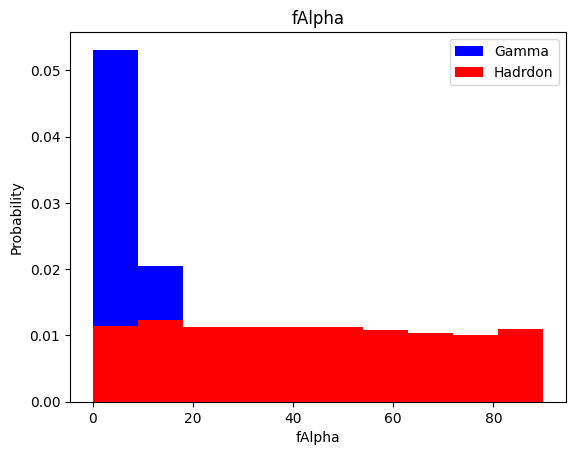

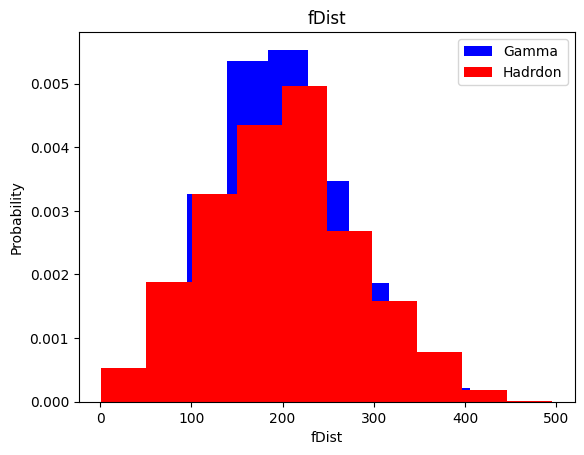

In [9]:
for x in col[:-1]:
  plt.hist(df[df["class"]==0][x],color="blue",label="Gamma",density=True)
  plt.hist(df[df["class"]==1][x],color="red",label="Hadrdon",density=True)
  plt.title(x)
  plt.xlabel(x)
  plt.ylabel("Probability")
  plt.legend()
  plt.show()


# Applying Scaling

In [10]:
label = df['class']
data= df.drop(columns=['class'])


In [11]:
scaler = StandardScaler()
scale_data=scaler.fit_transform(data)
scaled_df = pd.DataFrame(scale_data, columns=data.columns)
scaled_df["Label"]=label

In [12]:
scaled_df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,Label
0,-0.577226,-0.336804,-0.381130,0.062759,-0.148923,0.541042,0.224818,-0.405842,0.476816,-1.497866,0
1,-0.510969,-0.570027,-0.648595,0.820383,1.471776,0.516919,0.260364,-0.490094,-0.815418,0.153125,0
2,2.568278,6.205858,2.615783,-1.875883,-1.773241,2.044992,-1.478536,-2.183030,1.889224,0.842635,0
3,-0.694768,-0.687259,-1.029478,1.282069,1.606608,0.532771,-0.333515,-0.355359,-0.658804,-1.031463,0
4,0.516622,0.476384,0.711157,-0.347506,-0.284660,-0.020200,0.353086,1.036620,-0.881039,2.176427,0


In [13]:
label_data=scaled_df["Label"]

# RandomOverSampler

In [14]:
from imblearn.over_sampling import RandomOverSampler
train_data=scaled_df.drop(columns=["Label"])

ros = RandomOverSampler(random_state=42)
my_train,my_label = ros.fit_resample(train_data, label_data)

In [15]:
my_label.value_counts()

0    12332
1    12332
Name: Label, dtype: int64

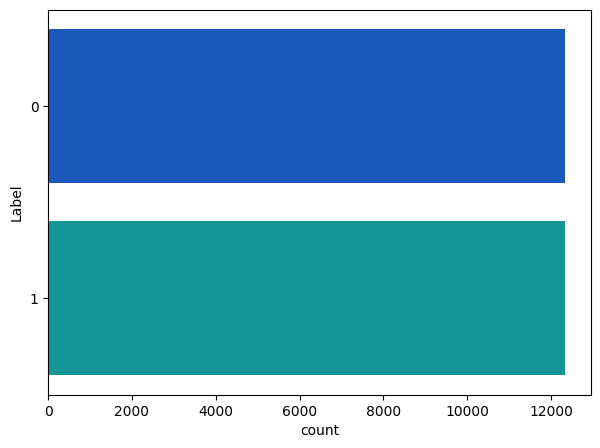

In [16]:
plt.figure(figsize=(7,5))
sns.countplot(y=my_label,palette="winter")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split


train_data, test_data, train_labels, test_labels = train_test_split(my_train, my_label, test_size=0.2, random_state=42)
train_data, valid_data, train_labels, valid_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)


# KNN


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data, train_labels)

KNeighborsClassifier()

In [20]:
predictions = knn.predict(test_data)
accuracy = accuracy_score(test_labels, predictions)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 83.86%


# Confusion Matrix

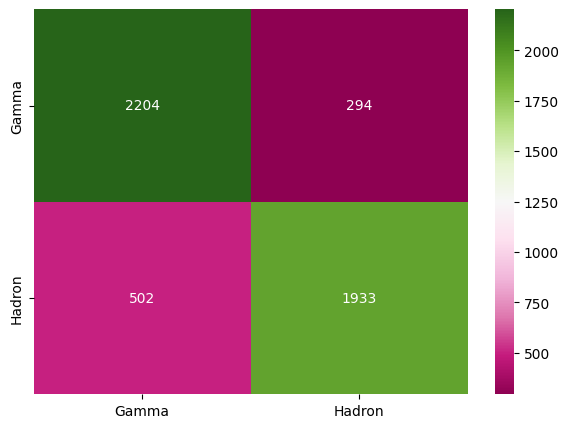

In [21]:
confusion = confusion_matrix(test_labels, predictions)
plt.figure(figsize=(7,5))
label_name=["Gamma","Hadron"]
sns.heatmap(confusion,annot=True,cmap="PiYG",fmt="d",xticklabels=label_name,yticklabels=label_name)
plt.show()

# Classification Report

In [22]:
print(classification_report(test_labels,predictions,target_names=label_name))

              precision    recall  f1-score   support

       Gamma       0.81      0.88      0.85      2498
      Hadron       0.87      0.79      0.83      2435

    accuracy                           0.84      4933
   macro avg       0.84      0.84      0.84      4933
weighted avg       0.84      0.84      0.84      4933



# Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(train_data,train_labels)

GaussianNB()

In [24]:
pred=nb.predict(test_data)
accuracy0 = accuracy_score(test_labels, pred)

print(f'Accuracy: {accuracy0 * 100:.2f}%')

Accuracy: 65.32%


# Confusion Matrix

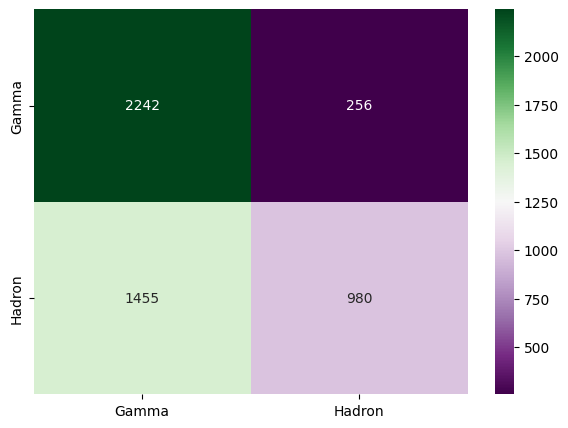

In [25]:
confusion = confusion_matrix(test_labels, pred)
plt.figure(figsize=(7,5))
label_name=["Gamma","Hadron"]
sns.heatmap(confusion,annot=True,cmap="PRGn",fmt="d",xticklabels=label_name,yticklabels=label_name)
plt.show()

# Classification Report

In [26]:
print(classification_report(test_labels,pred,target_names=label_name))

              precision    recall  f1-score   support

       Gamma       0.61      0.90      0.72      2498
      Hadron       0.79      0.40      0.53      2435

    accuracy                           0.65      4933
   macro avg       0.70      0.65      0.63      4933
weighted avg       0.70      0.65      0.63      4933



# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lg= LogisticRegression()
lg.fit(train_data,train_labels)

LogisticRegression()

In [28]:
my_pred=lg.predict(test_data)
accuracy1 = accuracy_score(test_labels,my_pred)

print(f'Accuracy: {accuracy1 * 100:.2f}%')

Accuracy: 77.01%


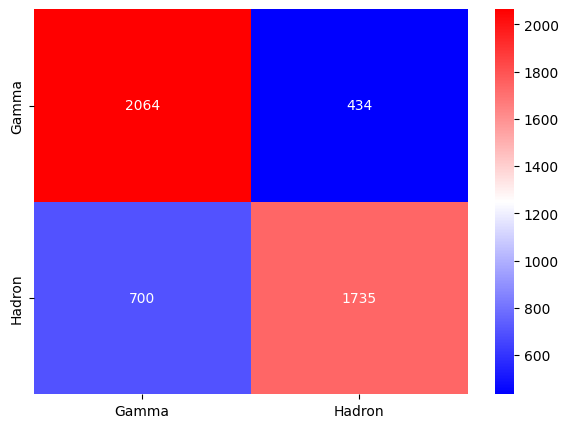

In [29]:
confusion = confusion_matrix(test_labels, my_pred)
plt.figure(figsize=(7,5))
label_name=["Gamma","Hadron"]
sns.heatmap(confusion,annot=True,cmap="bwr",fmt="d",xticklabels=label_name,yticklabels=label_name)
plt.show()

In [30]:
print(classification_report(test_labels,my_pred,target_names=label_name))

              precision    recall  f1-score   support

       Gamma       0.75      0.83      0.78      2498
      Hadron       0.80      0.71      0.75      2435

    accuracy                           0.77      4933
   macro avg       0.77      0.77      0.77      4933
weighted avg       0.77      0.77      0.77      4933



# SVM

In [31]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(train_data,train_labels)

SVC()

In [32]:
pre=sv.predict(test_data)
accuracy2 = accuracy_score(test_labels,pre)

print(f'Accuracy: {accuracy2* 100:.2f}%')

Accuracy: 85.40%


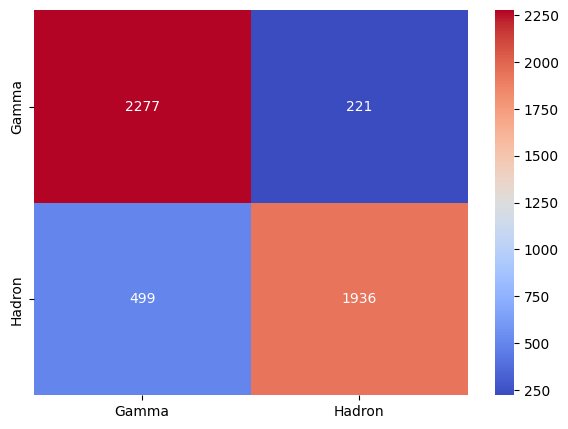

In [33]:
confusion = confusion_matrix(test_labels,pre)
plt.figure(figsize=(7,5))
label_name=["Gamma","Hadron"]
sns.heatmap(confusion,annot=True,cmap="coolwarm",fmt="d",xticklabels=label_name,yticklabels=label_name)
plt.show()

In [34]:
print(classification_report(test_labels,pre,target_names=label_name))

              precision    recall  f1-score   support

       Gamma       0.82      0.91      0.86      2498
      Hadron       0.90      0.80      0.84      2435

    accuracy                           0.85      4933
   macro avg       0.86      0.85      0.85      4933
weighted avg       0.86      0.85      0.85      4933



# Create Neural Network

In [35]:
import tensorflow as tf

nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

nn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
history=nn_model.fit(train_data,train_labels,validation_data=(valid_data,valid_labels),epochs=50,batch_size=32)

Epoch 1/50
494/494 [==============================] - 13s 8ms/step - loss: 0.4430 - accuracy: 0.7931 - val_loss: 0.3961 - val_accuracy: 0.8214
Epoch 2/50
494/494 [==============================] - 3s 5ms/step - loss: 0.3739 - accuracy: 0.8348 - val_loss: 0.3797 - val_accuracy: 0.8315
Epoch 3/50
494/494 [==============================] - 2s 4ms/step - loss: 0.3589 - accuracy: 0.8406 - val_loss: 0.3670 - val_accuracy: 0.8325
Epoch 4/50
494/494 [==============================] - 2s 4ms/step - loss: 0.3480 - accuracy: 0.8453 - val_loss: 0.3587 - val_accuracy: 0.8391
Epoch 5/50
494/494 [==============================] - 2s 4ms/step - loss: 0.3407 - accuracy: 0.8487 - val_loss: 0.3522 - val_accuracy: 0.8422
Epoch 6/50
494/494 [==============================] - 2s 5ms/step - loss: 0.3359 - accuracy: 0.8507 - val_loss: 0.3534 - val_accuracy: 0.8414
Epoch 7/50
494/494 [==============================] - 2s 5ms/step - loss: 0.3315 - accuracy: 0.8543 - val_loss: 0.3508 - val_accuracy: 0.8401
Epoch

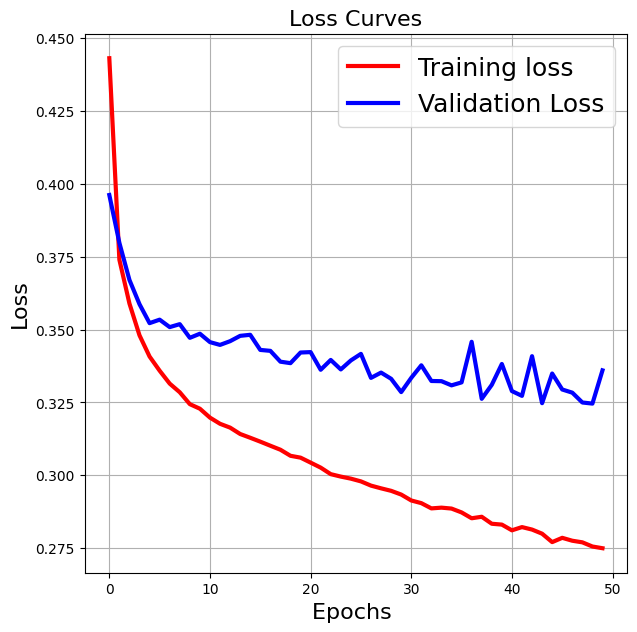

In [37]:
plt.figure(figsize=(7,7))
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.grid(True)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
plt.show()

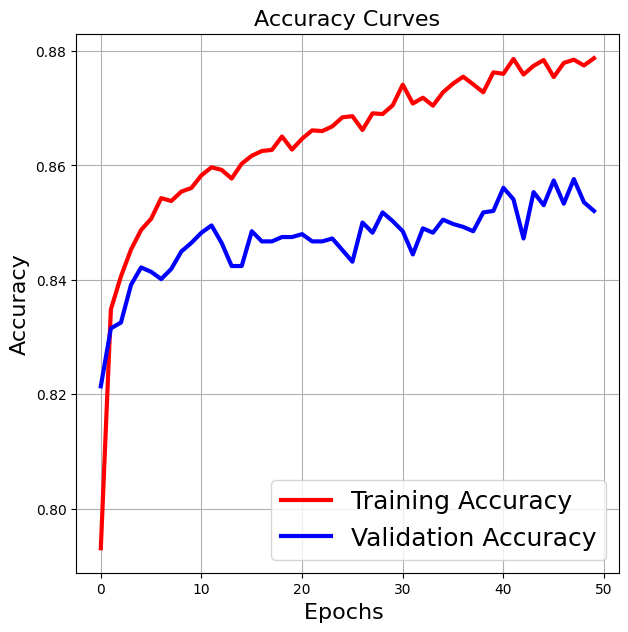

In [38]:
plt.figure(figsize=[7,7])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.grid(True)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)
plt.show()

In [39]:
my_pred=nn_model.predict(test_data)
final_pred=(my_pred>=0.5).astype(int)

155/155 [==============================] - 0s 1ms/step


In [40]:
accuracy4 = accuracy_score(test_labels,final_pred)

print(f'Accuracy: {accuracy4* 100:.2f}%')

Accuracy: 86.70%


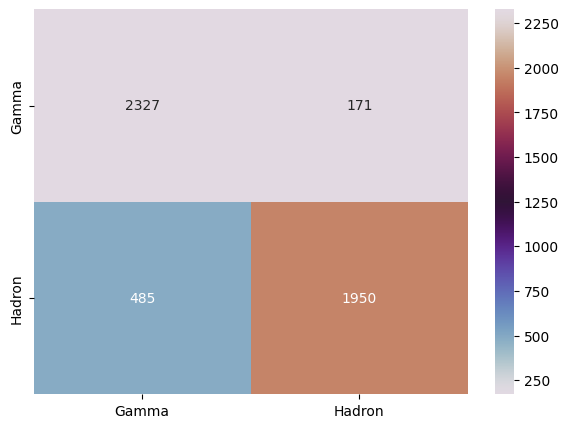

In [41]:
confusion = confusion_matrix(test_labels,final_pred)
plt.figure(figsize=(7,5))
label_name=["Gamma","Hadron"]
sns.heatmap(confusion,annot=True,cmap="twilight",fmt="d",xticklabels=label_name,yticklabels=label_name)
plt.show()

In [44]:
print(classification_report(test_labels,final_pred,target_names=label_name))

              precision    recall  f1-score   support

       Gamma       0.83      0.93      0.88      2498
      Hadron       0.92      0.80      0.86      2435

    accuracy                           0.87      4933
   macro avg       0.87      0.87      0.87      4933
weighted avg       0.87      0.87      0.87      4933

